# Titanic - Machine Learning from Disaster

## Importing Dependencies

In [107]:
# Importing libraries for data visualization 
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import seaborn as sns 
import missingno 
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Import tools for Evaluating Models
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


## Loading the Data 

In [120]:
# Train data
train = pd.read_csv("../Datas/train.csv")
# Test data
test = pd.read_csv("../Datas/test.csv")
# Passenger DataFrame for Submission 
pass_df = pd.DataFrame(test["PassengerId"])
# Combine Data 
train.name = "Training set"
test.name = "Test set"
combine = [train, test]

In [121]:
# Viewing Train data 
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [122]:
# Viewing Test data 
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [123]:
# Viewing the Passenger Id for test 
pass_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [124]:
# Printing the shape of train and test split
print(f"Shape of Training set: {train.shape}")
print(f"Shape of Test set: {test.shape}")
print("-" * 40)
print(f"Columns of Training set:{train.columns}")
print(f"Columns of Test set:{test.columns}")

Shape of Training set: (891, 12)
Shape of Test set: (418, 11)
----------------------------------------
Columns of Training set:Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns of Test set:Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Exploratory Data Analysis 

In [125]:
# Let's see the data types and counts of our training data 
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [126]:
# Let's see the data types and counts of our test data 
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [127]:
# Let's see some statistics of our training data 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
# Let's also see the distributions between our categorical variables
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [129]:
# Let's see some statistics of our training data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [130]:
# Let's also see the distributions between our categorical variables
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Deacon, Mr. Percy William",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Checking for Missing Values

In [131]:
def display_missing(df):   
    """
    Displaying the missing values in Training and Test set
    """
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in combine:
    print('{}'.format(df.name))
    display_missing(df)

Training set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




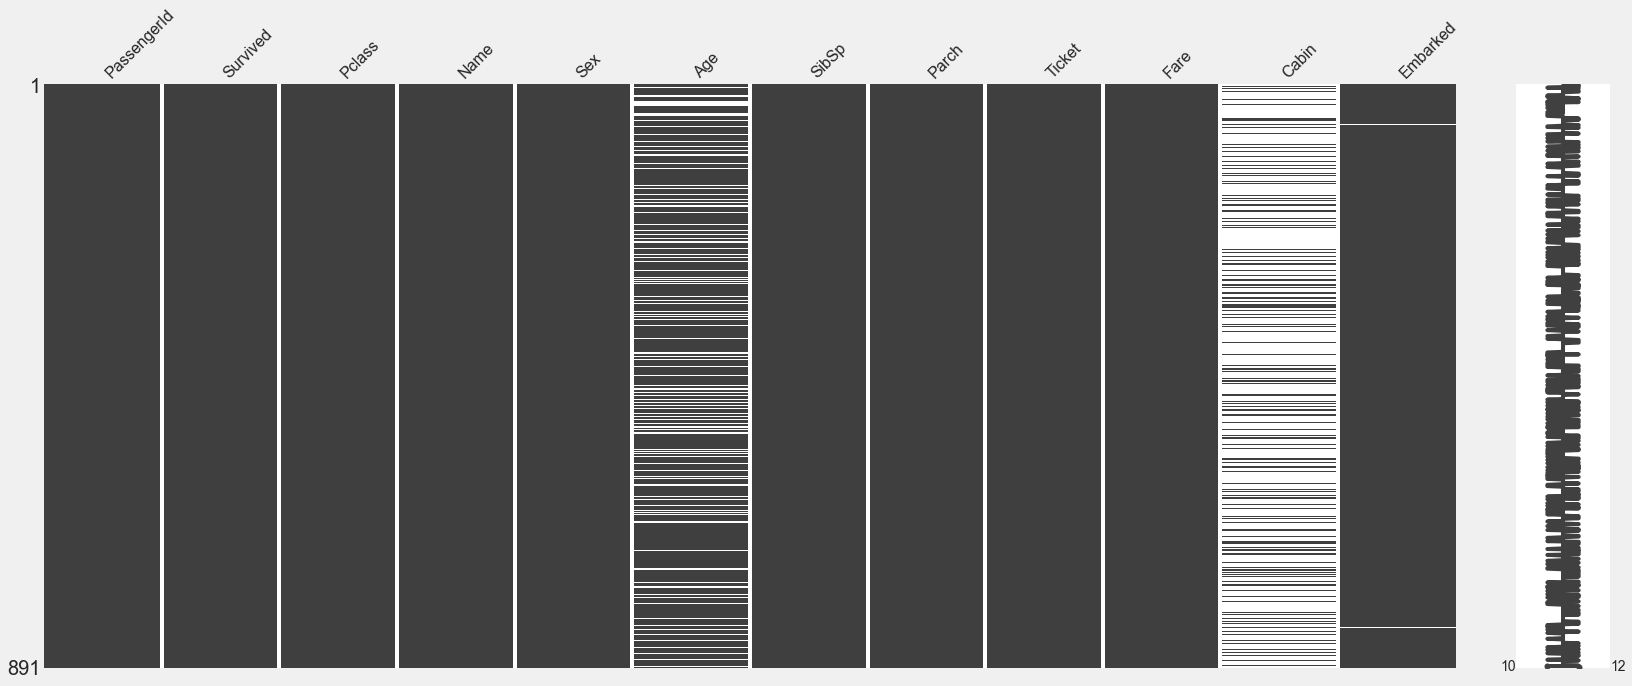

In [132]:
# Let's visualize the missing values 
missingno.matrix(train, figsize = (25,10));

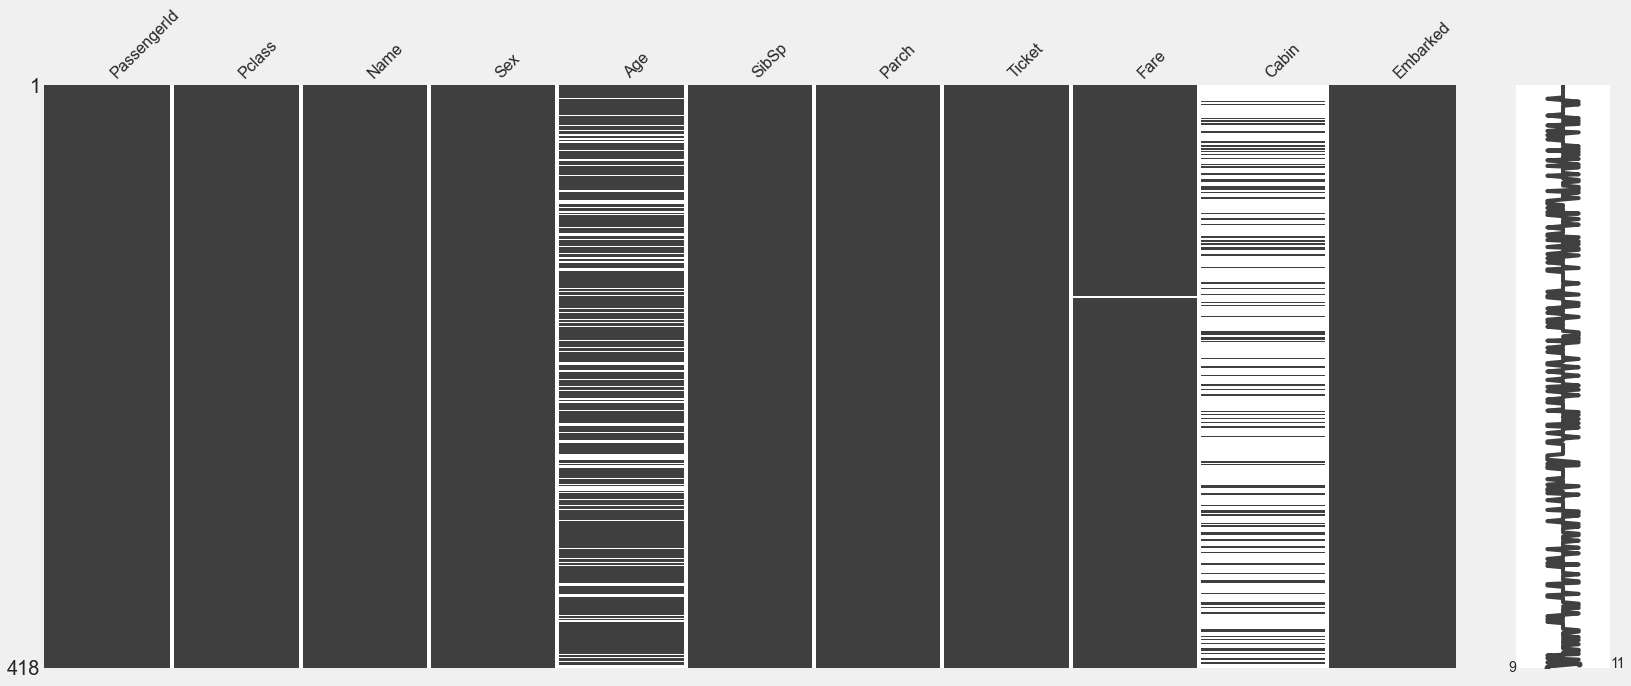

In [133]:
missingno.matrix(test, figsize = (25,10));

### Lets Check Correlation of each numerical variable 

In [134]:
# Checking the correlation of the numerical attributes
train_corr = train.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


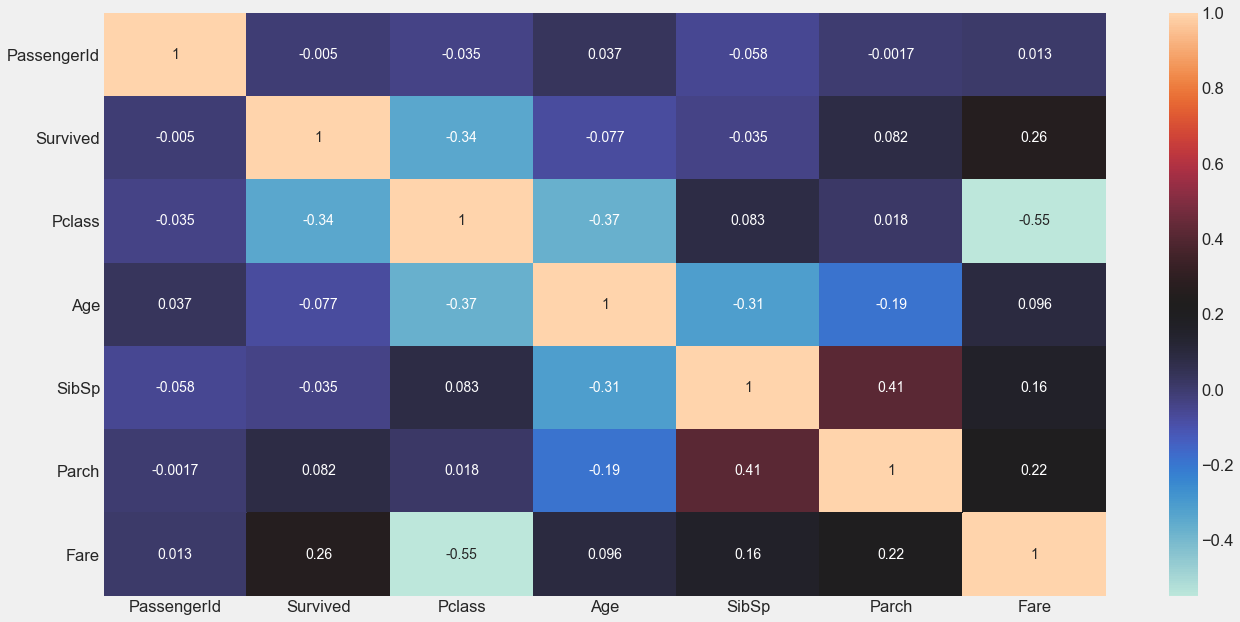

In [135]:
# Let's visualize it 
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(train_corr, annot=True, ax=ax, cmap="icefire");

### Cleaning the Data

In [136]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
# Making Sex as numerical 
sex_map = {"male": 1, "female": 0}
train["Sex"] = [sex_map[sex] for sex in train["Sex"]]
test["Sex"] = [sex_map[sex] for sex in test["Sex"]]
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [138]:
# Getting the titles in names
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Train data
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

# Test data
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# Train Data
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)
# Test data
test['Title'] = test['Title'].map(title_mapping)
test['Title'] = test['Title'].fillna(0)
    

In [139]:
# Drop Cabin column 
train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

# Drop Ticket Column 
train = train.drop("Ticket", axis = 1)
test = test.drop("Ticket", axis = 1)

# Drop the name column
train = train.drop("Name", axis=1)
test = test.drop("Name", axis=1)
# Drop the Passenger ID column 
train = train.drop("PassengerId", axis=1)
test = test.drop("PassengerId", axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


In [140]:
# Filling the Embarked Values with its mode 
common_port = train.Embarked.mode()[0]
common_port
train["Embarked"] = train["Embarked"].fillna(value=common_port)

# Creating mapping for embarked 
embarked_map = {"S":0, "C": 1, "Q": 2}
train["Embarked"]= [embarked_map[port] for port in train["Embarked"]]
test["Embarked"]= [embarked_map[port] for port in test["Embarked"]]

In [141]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,3
2,1,3,0,26.0,0,0,7.9250,0,2
3,1,1,0,35.0,1,0,53.1000,0,3
4,0,3,1,35.0,0,0,8.0500,0,1


In [142]:
# Filling the age missing value with its median
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(test.Age.median())

# Train data
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4
# Test data
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age']= 4

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,1,0,7.2500,0,1
1,1,1,0,2.0,1,0,71.2833,1,3
2,1,3,0,1.0,0,0,7.9250,0,2
3,1,1,0,2.0,1,0,53.1000,0,3
4,0,3,1,2.0,0,0,8.0500,0,1


In [143]:
# Filling the Test fare missing values with its median 
test["Fare"] = test.Fare.fillna(value=test.Fare.median())
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [144]:
# Splitting the values of Fare into Five section
train['FareBand'] = pd.qcut(train['Fare'], 5)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

# Train data
train.loc[ train['Fare'] <= 7.854, 'Fare'] = 0
train.loc[(train['Fare'] > 7.854) & (train['Fare'] <= 10.5), 'Fare'] = 1
train.loc[(train['Fare'] > 10.5) & (train['Fare'] <= 21.679), 'Fare'] = 2
train.loc[(train['Fare'] > 21.679) & (train['Fare'] <= 39.688), 'Fare'] = 3
train.loc[ train['Fare'] > 39.688, 'Fare'] = 4
# Test data
test.loc[ test['Fare'] <= 7.854, 'Fare'] = 0
test.loc[(test['Fare'] > 7.854) & (test['Fare'] <= 10.5), 'Fare'] = 1
test.loc[(test['Fare'] > 10.5) & (test['Fare'] <= 21.679), 'Fare'] = 2
test.loc[(test['Fare'] > 21.679) & (test['Fare'] <= 39.688), 'Fare'] = 3
test.loc[ test['Fare'] > 39.688, 'Fare'] = 4
# Dropping the Fareband 
train.drop("FareBand", axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,1,0,0.0,0,1
1,1,1,0,2.0,1,0,4.0,1,3
2,1,3,0,1.0,0,0,1.0,0,2
3,1,1,0,2.0,1,0,4.0,0,3
4,0,3,1,2.0,0,0,1.0,0,1


In [145]:
train.info()
print("-" * 100)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     4

### Checking Relationship between Attributes

In [146]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,1,0,0.0,0,1
1,1,1,0,2.0,1,0,4.0,1,3
2,1,3,0,1.0,0,0,1.0,0,2
3,1,1,0,2.0,1,0,4.0,0,3
4,0,3,1,2.0,0,0,1.0,0,1


####  Sex vs Survived

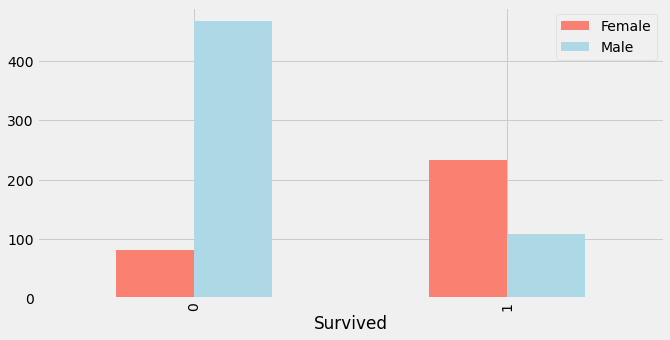

In [29]:
pd.crosstab(train.Survived, train.Sex).plot(kind="bar", figsize=(10,5), color=["salmon", "lightblue"]);
plt.legend(["Female", "Male"]);

#### Survived vs Pclass

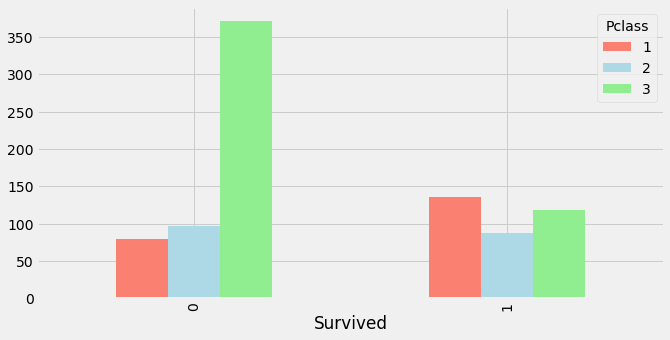

In [30]:
pd.crosstab(train.Survived, train.Pclass).plot(kind="bar", figsize=(10,5), color=["salmon", "lightblue", "lightgreen"]);

#### Survived vs Age

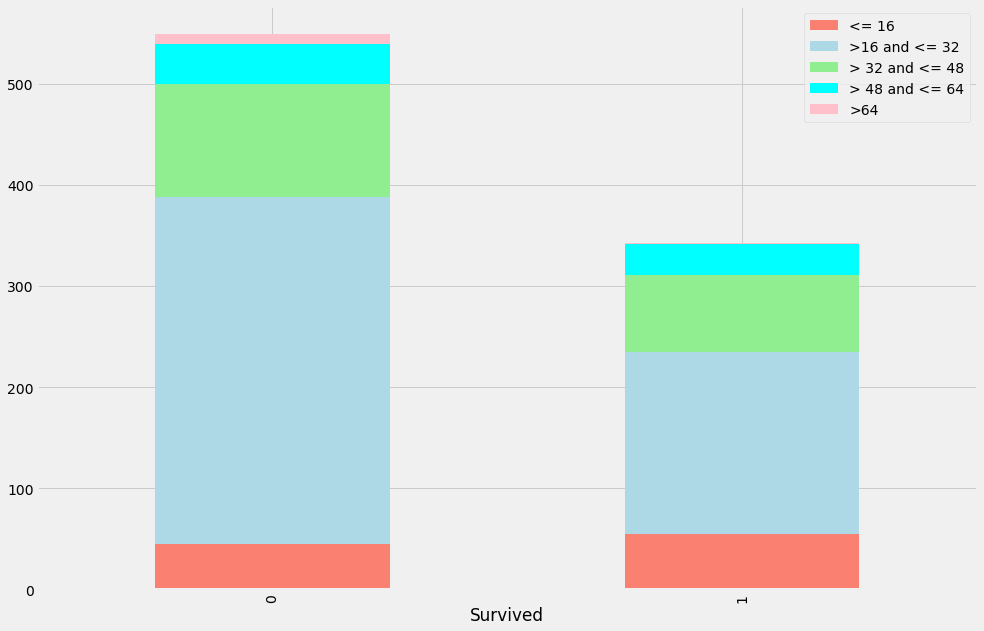

In [31]:
pd.crosstab(train.Survived, train.Age).plot(kind="bar",
                                            figsize=(15, 10), 
                                            stacked=True, 
                                            color=["salmon", "lightblue", "lightgreen", "cyan", "pink"]);
plt.legend(["<= 16", ">16 and <= 32", "> 32 and <= 48", "> 48 and <= 64", ">64"]);

#### Survived vs Embarked

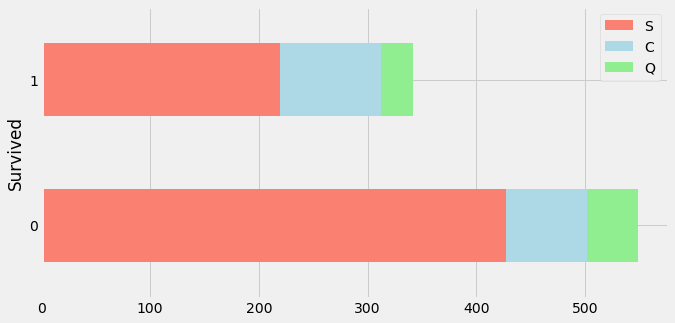

In [32]:
pd.crosstab(train.Survived, train.Embarked).plot(kind="barh", 
                                                 figsize=(10, 5),
                                                 color=["salmon", "lightblue", "lightgreen"],
                                                 stacked=True);
plt.legend(["S", "C", "Q"]);

#### Pclass vs Age

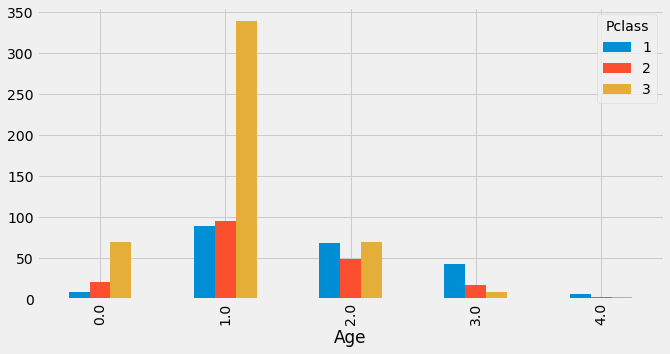

In [33]:
pd.crosstab(train.Age, train.Pclass).plot(kind="bar", figsize=(10, 5));

## Modeling and Tuning

### Initial Training 

In [88]:
X = train.drop("Survived", axis=1)
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
X_train.shape, y_train.shape

((623, 6), (623,))

In [90]:
X_test.shape, y_test.shape

((268, 6), (268,))

#### K-Nearest Neighbors Classifier 

In [91]:
np.random.seed(42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test)* 100)

78.35820895522389


#### Logistic Regression Classifier

In [92]:
np.random.seed(42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test) * 100)

79.1044776119403


#### SVC

In [93]:
np.random.seed(42)
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test) * 100)

81.71641791044776


#### Random Forest Classifier

In [94]:
np.random.seed(42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test) * 100)

78.35820895522389


### Tuning our Models

#### K-Nearest Neighbors Using GridSearchCV

In [95]:
np.random.seed(42)
knn_grid = {"n_neighbors":np.arange(1, 11, 2),
            "weights":["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]}

knn_tuned = GridSearchCV(knn, 
                         knn_grid, 
                         cv=5, 
                         verbose=True)
knn_tuned_results = knn_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [96]:
knn_tuned_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [97]:
knn_tuned_results.score(X_test, y_test)

0.8022388059701493

#### Logistic Regression Using GridSearchCV

In [98]:
np.random.seed(42)
log_reg_grid = {"penalty":["l1", "l2"],
                "C":[0.01, 0.1, 1, 10],
                "solver":["newton-cg", "lbfgs", "liblinear"]}

log_reg_tuned = GridSearchCV(log_reg, 
                            log_reg_grid, 
                            cv=5,
                            verbose=1)
log_reg_results = log_reg_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [99]:
log_reg_results.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [100]:
log_reg_results.score(X_test, y_test)

0.7798507462686567

#### SVC Using GridSearchCV

In [101]:
np.random.seed(42)
svc_grid = {"C":[0.01, 0.1, 1, 10],
            "kernel":["linear", "rbf", "poly"],
            "degree":np.arange(2, 5),
            "gamma":["scale", "auto"],
           }

svc_tuned = GridSearchCV(svc, 
                         svc_grid, 
                         cv=5, 
                         verbose=1)
svc_results = svc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [102]:
svc_results.best_params_

{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [103]:
svc_results.score(X_test, y_test)

0.7910447761194029

#### RandomForest using RandomizedSearchCV

In [104]:
np.random.seed(42)
rf_grid = {"n_estimators":[int(x) for x in np.linspace(start=200, stop=2000, num=10)],
            "max_features":["auto", "sqrt", "log2"],
            "max_depth":[int(x) for x in np.linspace(start=10, stop=110, num=11)],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap":[True, False]
           }

rf_tuned = RandomizedSearchCV(rf, 
                              rf_grid, 
                              cv=5,
                              n_iter = 20, 
                              verbose=1)
rf_results = rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [105]:
rf_results.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 110,
 'bootstrap': True}

In [106]:
rf_results.score(X_test, y_test)

0.7985074626865671

### Evaluating the Models

In [53]:
knn_y_preds = knn_tuned.predict(X_test)
log_reg_y_preds = log_reg_tuned.predict(X_test)
svc_y_preds = svc_tuned.predict(X_test)
rf_y_preds = rf_tuned.predict(X_test)

#### ROC AUC Curve

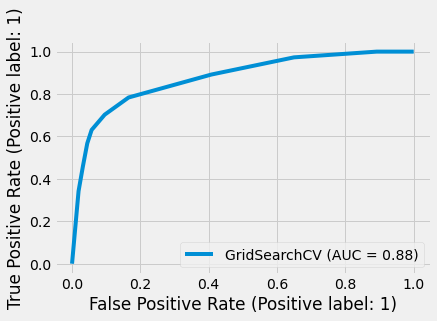

In [54]:
# K-Nearest Neighbors
plot_roc_curve(knn_tuned, X_test, y_test);

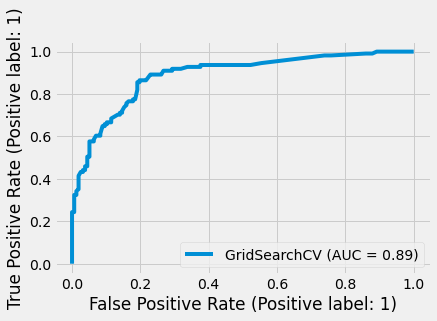

In [55]:
# Logistic Regression
plot_roc_curve(log_reg_tuned, X_test, y_test);

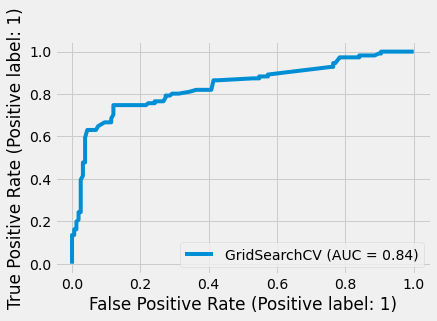

In [56]:
# SVC
plot_roc_curve(svc_tuned, X_test, y_test);

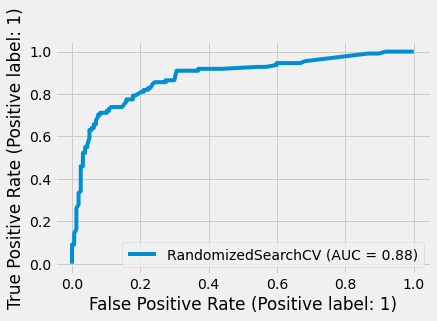

In [57]:
# RandomForest 
plot_roc_curve(rf_tuned, X_test, y_test);

#### Confusion Matrix

In [58]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     fmt="d")
    plt.xlabel("true label")
    plt.ylabel("predicted label")    

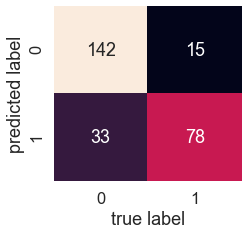

In [59]:
# K-Nearest Neighbors
plot_conf_mat(y_test, knn_y_preds)

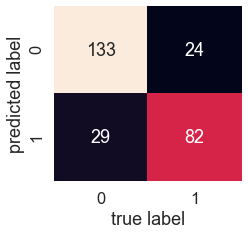

In [60]:
# Logistic Regression
plot_conf_mat(y_test, log_reg_y_preds)

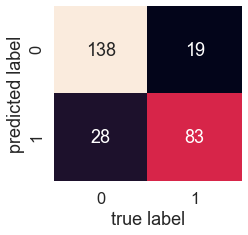

In [61]:
# SVC
plot_conf_mat(y_test, svc_y_preds)

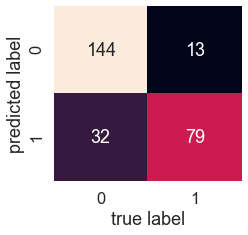

In [62]:
# RandomForest
plot_conf_mat(y_test, rf_y_preds)

#### Classification report

In [63]:
print(classification_report(y_test, knn_y_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       157
           1       0.84      0.70      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [64]:
print(classification_report(y_test, log_reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.74      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [65]:
print(classification_report(y_test, svc_y_preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.81      0.75      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



In [66]:
print(classification_report(y_test, rf_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       157
           1       0.86      0.71      0.78       111

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [67]:
svc_results.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

## Final Prediction Using SVC and RandomForest Model

In [68]:
pass_df["Survived"] = rf_tuned.predict(test)

In [69]:
pass_df.to_csv("RandomForestModelPrediction.csv", index=False)

In [70]:
pass_df["Survived"] = svc_tuned.predict(test)

In [71]:
pass_df.to_csv("SVCModelPrediction.csv", index=False)

In [72]:
pass_df["Survived"] = knn_tuned.predict(test)

In [73]:
pass_df.to_csv("knnPrediction.csv", index=False)